In [88]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# from IPython.display import display
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
# from statsmodels.stats.outliers_influence import variance_inflation_factor


In [89]:
df = pd.read_csv('Advertising Budget and Sales.csv', index_col = 0, names=['TV','Radio','Newspaper','Sales'],skiprows=1)
target = 'Sales'
features = [i for i in df.columns if i is not target]
features

['TV', 'Radio', 'Newspaper']

In [90]:
df.head()

,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [91]:
df.iloc[1]

TV           44.5
Radio        39.3
Newspaper    45.1
Sales        10.4
Name: 2, dtype: float64

In [92]:
df.columns

Index(['TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

In [93]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [94]:
#Checking number of unique rows in each feature

df.nunique().sort_values()


Sales        121
Radio        167
Newspaper    172
TV           190
dtype: int64

In [95]:
df[features].nunique().sort_values()

Radio        167
Newspaper    172
TV           190
dtype: int64

In [96]:
df[features].values

array([[230.1,  37.8,  69.2],
       [ 44.5,  39.3,  45.1],
       [ 17.2,  45.9,  69.3],
       [151.5,  41.3,  58.5],
       [180.8,  10.8,  58.4],
       [  8.7,  48.9,  75. ],
       [ 57.5,  32.8,  23.5],
       [120.2,  19.6,  11.6],
       [  8.6,   2.1,   1. ],
       [199.8,   2.6,  21.2],
       [ 66.1,   5.8,  24.2],
       [214.7,  24. ,   4. ],
       [ 23.8,  35.1,  65.9],
       [ 97.5,   7.6,   7.2],
       [204.1,  32.9,  46. ],
       [195.4,  47.7,  52.9],
       [ 67.8,  36.6, 114. ],
       [281.4,  39.6,  55.8],
       [ 69.2,  20.5,  18.3],
       [147.3,  23.9,  19.1],
       [218.4,  27.7,  53.4],
       [237.4,   5.1,  23.5],
       [ 13.2,  15.9,  49.6],
       [228.3,  16.9,  26.2],
       [ 62.3,  12.6,  18.3],
       [262.9,   3.5,  19.5],
       [142.9,  29.3,  12.6],
       [240.1,  16.7,  22.9],
       [248.8,  27.1,  22.9],
       [ 70.6,  16. ,  40.8],
       [292.9,  28.3,  43.2],
       [112.9,  17.4,  38.6],
       [ 97.2,   1.5,  30. ],
       [26

In [97]:
nu =df[features].nunique().sort_values()
nf = []; cf = []; nnf = 0; ncf = 0; #numerical & categorical features

for i in range(df[features].shape[1]):
    if nu.values[i]<=16:
        cf.append(nu.index[i])
    else: 
        nf.append(nu.index[i])

print('\n\033[1mInference:\033[0m The Datset has {} numerical & {} categorical features.'.format(len(nf),len(cf)))


Inference: The Datset has 3 numerical & 0 categorical features.


<Figure size 576x288 with 0 Axes>

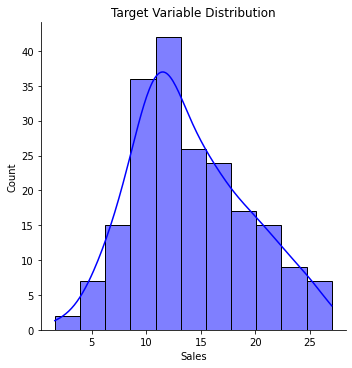

In [98]:
#analyzing the distribution of the target variable

plt.figure(figsize=[8, 4])
sns.displot(df[target], color='b', kde=True)
plt.title('Target Variable Distribution')
plt.show()


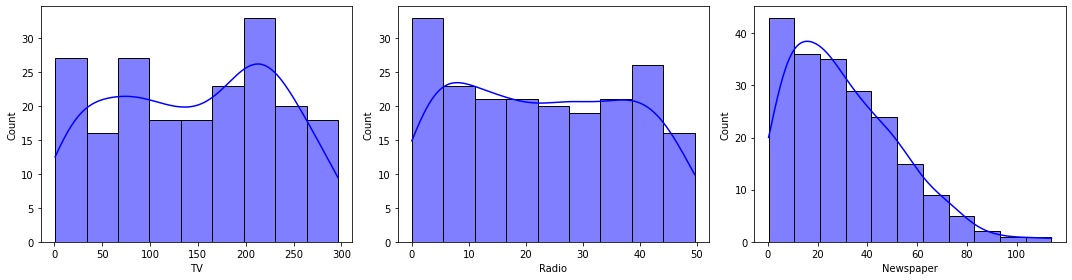

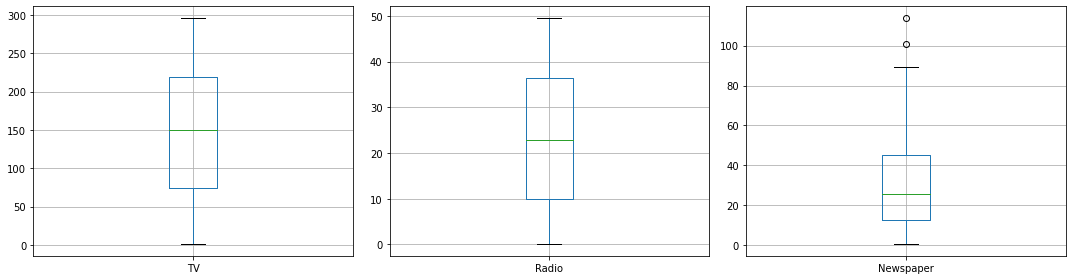

In [99]:
plt.figure(figsize=[15,4])
for i in range(len(features)):
    plt.subplot(1,3,i+1)
    sns.histplot(df[features[i]],kde=True,color='b')
plt.tight_layout()
plt.show()

plt.figure(figsize=[15, 4])
for i in range(len(features)):
    plt.subplot(1, 3, i+1)
    df.boxplot(features[i])
plt.tight_layout()
plt.show()


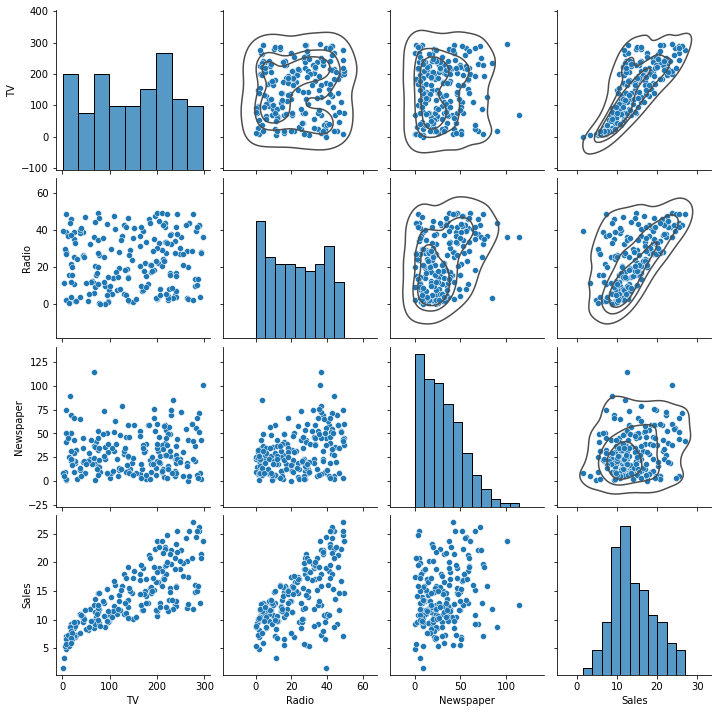

In [100]:
#Understanding the relationship between all the features

g = sns.pairplot(df)
# plt.title('Pairplots for all the Feature')
g.map_upper(sns.kdeplot, levels=4, color=".3")
plt.show()


In [101]:
#removing duplicates if any
df.drop_duplicates(inplace=True)
df.shape        #originally (200,4)

(200, 4)

In [102]:
#Check for empty elements

nvc = pd.DataFrame(df.isnull().sum().sort_values(),
                   columns=['Total Null Values'])
nvc['Percentage'] = round(nvc['Total Null Values']/df.shape[0], 3)*100
print(nvc)


           Total Null Values  Percentage
TV                         0         0.0
Radio                      0         0.0
Newspaper                  0         0.0
Sales                      0         0.0


In [103]:
# Removal of outlier:

df1 = df.copy()

features1 = features

for i in features1:
    Q1 = df1[i].quantile(0.25)
    Q3 = df1[i].quantile(0.75)
    IQR = Q3 - Q1
    df1 = df1[df1[i] <= (Q3+(1.5*IQR))]
    df1 = df1[df1[i] >= (Q1-(1.5*IQR))]
    df1 = df1.reset_index(drop=True)
print(df1.head())
print('\n\033[1mInference:\033[0m\nBefore removal of outliers, The dataset had {} samples.'.format(
    df.shape[0]))
print('After removal of outliers, The dataset now has {} samples.'.format(
    df1.shape[0]))


      TV  Radio  Newspaper  Sales
0  230.1   37.8       69.2   22.1
1   44.5   39.3       45.1   10.4
2   17.2   45.9       69.3    9.3
3  151.5   41.3       58.5   18.5
4  180.8   10.8       58.4   12.9

Inference:
Before removal of outliers, The dataset had 200 samples.
After removal of outliers, The dataset now has 198 samples.


                 TV     Radio  Newspaper     Sales
TV         1.000000  0.051978   0.049771  0.779121
Radio      0.051978  1.000000   0.346364  0.576748
Newspaper  0.049771  0.346364   1.000000  0.219555
Sales      0.779121  0.576748   0.219555  1.000000
                Correlation Matrix                


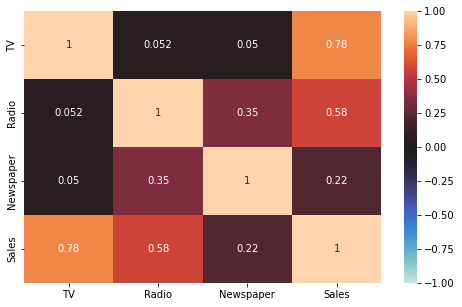

In [104]:
#Checking the correlation between features
df = df1.copy()
print(df.corr())
print('\033[31mCorrelation Matrix'.center(55))
plt.figure(figsize=[8, 5])
sns.heatmap(df.corr(), annot=True, vmin=-1, vmax=1, center=0)  # cmap='BuGn'
plt.show()


In [105]:
#Feature Scaling

#First train_test split then fit_transform for train set and transform for the test set
df = df1.copy()

X = df.drop([target],axis=1)
Y = df[target]

X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2, train_size=0.8,random_state=100)
X_train.reset_index(drop=True, inplace=True)

print('Original set  ---> ', X.shape, Y.shape, '\nTraining set  ---> ', X_train.shape,
      Y_train.shape, '\nTesting set   ---> ', X_test.shape, '', Y_test.shape)


scaler = StandardScaler()

X_train_std = scaler.fit_transform(X_train)  #total training samples this returns np array
X_train_std = pd.DataFrame(X_train_std, columns=features)
print("\nStandard Training Set\n")
print(X_train_std.head())

X_test_std = scaler.transform(X_test)
X_test_std = pd.DataFrame(X_test_std, columns=features)
print("\nStandard Testing Set\n")
print(X_test_std.head())




Original set  --->  (198, 3) (198,) 
Training set  --->  (158, 3) (158,) 
Testing set   --->  (40, 3)  (40,)

Standard Training Set

         TV     Radio  Newspaper
0  0.783024  0.073259   1.307689
1 -0.829210  1.643664   0.156395
2 -0.200533 -0.278728   0.161379
3  0.819452 -1.158696  -0.197466
4 -0.335669 -0.197500  -0.984931

Standard Testing Set

         TV     Radio  Newspaper
0  0.840604  1.792582  -1.403583
1 -1.454362 -0.779633  -0.082835
2  0.865281 -1.233155   0.918941
3  1.200184  0.946459   2.040331
4  0.714869 -0.129810  -1.029786


In [106]:
#Linear regression model without eliminating the multicollinearity between independent variables
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

linReg = LinearRegression().fit(X_train_std,Y_train)
Y_pred = linReg.predict(X_test_std)
print(f'Coefficient of Determination (R squared) = {linReg.score(X_test_std,Y_test)}')
print(f'Mean Squared Error (MSE) = {mean_squared_error(Y_test,Y_pred)}')
print(f'Root Mean Squared Error (RMSE) = {np.sqrt(mean_squared_error(Y_test,Y_pred))}')
# r2_score(Y_test, Y_pred)
# linReg.coef


Coefficient of Determination (R squared) = 0.8556177767066229
Mean Squared Error (MSE) = 4.767247441867655
Root Mean Squared Error (RMSE) = 2.183402720953616


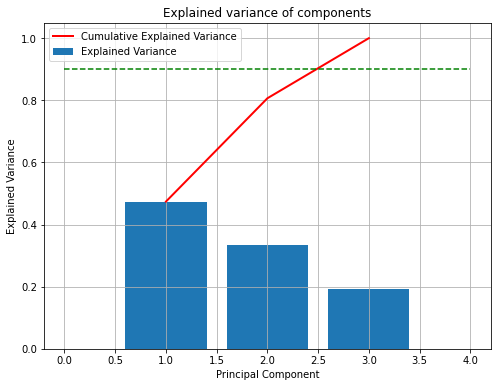

In [107]:
#Feature Elimination using PCA

from sklearn.decomposition import PCA

pca = PCA().fit(X_train_std)

fig, ax = plt.subplots(figsize=(8, 6))
x_values = range(1, pca.n_components_+1)
ax.bar(x_values, pca.explained_variance_ratio_,
       lw=2, label='Explained Variance')
ax.plot(x_values, np.cumsum(pca.explained_variance_ratio_),
        lw=2, label='Cumulative Explained Variance', color='red')
plt.plot([0, pca.n_components_+1], [0.9, 0.9], 'g--')
ax.set_title('Explained variance of components')
ax.set_xlabel('Principal Component')
ax.set_ylabel('Explained Variance')
plt.legend()
plt.grid()
plt.show()


m=3


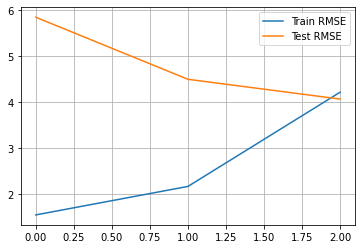

Train RMSE = [1.55, 2.17, 4.22]
Test RMSE = [5.85, 4.5, 4.07]


In [108]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import PolynomialFeatures
Trr = []
Tss = []
n = 3
m = df.shape[1]-1
print(f'm={m}')

for i in range(m):
    pca = PCA(n_components=X_train_std.shape[1]-i)
    Train_X_std_pca = pca.fit_transform(X_train_std)
    Test_X_std_pca = pca.fit_transform(X_test_std)

    LR = LinearRegression()
    LR.fit(Train_X_std_pca, Y_train)

    pred1 = LR.predict(Train_X_std_pca)
    pred2 = LR.predict(Test_X_std_pca)

    Trr.append(round(np.sqrt(mean_squared_error(Y_train, pred1)), 2))
    Tss.append(round(np.sqrt(mean_squared_error(Y_test, pred2)), 2))

plt.plot(Trr, label='Train RMSE')
plt.plot(Tss, label='Test RMSE')
plt.legend()
plt.grid()
plt.show()
print(f'Train RMSE = {Trr}')
print(f'Test RMSE = {Tss}')

In [109]:

#define a function to evaluate our models

Model_Evaluation_Comparison_Matrix = pd.DataFrame(np.zeros([2,8]), columns=['Train-R2','Test-R2','Train-RSS','Test-RSS',
                                                                            'Train-MSE','Test-MSE','Train-RMSE','Test-RMSE'])
rc=np.random.choice(X_train_std.columns,3)
def Evaluate(n, pred1,pred2):
    #Plotting predicted predicteds alongside the actual datapoints 
    plt.figure(figsize=[15,6])
    for e,i in enumerate(rc):
        plt.subplot(2,3,e+1)
        plt.scatter(y=Y_train, x=X_train_std[i], label='Actual')
        plt.scatter(y=pred1, x=X_train_std[i], label='Prediction')
        plt.legend()
    plt.show()

    #Evaluating the Multiple Linear Regression Model

    print('\n\n{}Training Set Metrics{}'.format('-'*20, '-'*20))
    print('\nR2-Score on Training set --->',round(r2_score(Y_train, pred1),20))
    print('Residual Sum of Squares (RSS) on Training set  --->',round(np.sum(np.square(Y_train-pred1)),20))
    print('Mean Squared Error (MSE) on Training set       --->',round(mean_squared_error(Y_train, pred1), 20))
    print('Root Mean Squared Error (RMSE) on Training set --->',round(np.sqrt(mean_squared_error(Y_train, pred1)), 20))

    print('\n{}Testing Set Metrics{}'.format('-'*20, '-'*20))
    print('\nR2-Score on Testing set --->',round(r2_score(Y_test, pred2),20))
    print('Residual Sum of Squares (RSS) on Training set  --->',round(np.sum(np.square(Y_test-pred2)),20))
    print('Mean Squared Error (MSE) on Training set       --->',round(mean_squared_error(Y_test, pred2),20))
    print('Root Mean Squared Error (RMSE) on Training set --->',round(np.sqrt(mean_squared_error(Y_test, pred2)),20))
    print('\n{}Residual Plots{}'.format('-'*20, '-'*20))
    
    Model_Evaluation_Comparison_Matrix.loc[n,'Train-R2']  = round(r2_score(Y_train, pred1),20)
    Model_Evaluation_Comparison_Matrix.loc[n,'Test-R2']   = round(r2_score(Y_test, pred2),20)
    Model_Evaluation_Comparison_Matrix.loc[n,'Train-RSS'] = round(np.sum(np.square(Y_train-pred1)),20)
    Model_Evaluation_Comparison_Matrix.loc[n,'Test-RSS']  = round(np.sum(np.square(Y_test-pred2)),20)
    Model_Evaluation_Comparison_Matrix.loc[n,'Train-MSE'] = round(mean_squared_error(Y_train, pred1),20)
    Model_Evaluation_Comparison_Matrix.loc[n,'Test-MSE']  = round(mean_squared_error(Y_test, pred2),20)
    Model_Evaluation_Comparison_Matrix.loc[n,'Train-RMSE']= round(np.sqrt(mean_squared_error(Y_train, pred1)),20)
    Model_Evaluation_Comparison_Matrix.loc[n,'Test-RMSE'] = round(np.sqrt(mean_squared_error(Y_test, pred2)),20)

    # Plotting y_test and y_pred to understand the spread.
    plt.figure(figsize=[15,4])

    plt.subplot(1,2,1)
    sns.histplot((Y_train - pred1),kde=True)
    plt.title('Error Terms')          
    plt.xlabel('Errors') 

    plt.subplot(1,2,2)
    plt.scatter(Y_train,pred1)
    plt.plot([Y_train.min(),Y_train.max()],[Y_train.min(),Y_train.max()], 'r--')
    plt.title('Test vs Prediction')         
    plt.xlabel('y_test')                       
    plt.ylabel('y_pred')                       
    plt.show()



<<<-------------------- Evaluating Multiple Linear Regression Model -------------------->>>

The Coeffecient of the Regresion Model was found to be  [ 3.69637815  2.94662484 -0.19283051]
The Intercept of the Regresion Model was found to be  14.000632911392405


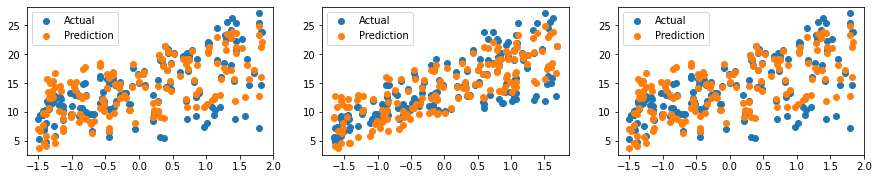



--------------------Training Set Metrics--------------------

R2-Score on Training set ---> 0.9046635059559758
Residual Sum of Squares (RSS) on Training set  ---> 381.14099667994697
Mean Squared Error (MSE) on Training set       ---> 2.4122847891135883
Root Mean Squared Error (RMSE) on Training set ---> 1.5531531763202198

--------------------Testing Set Metrics--------------------

R2-Score on Testing set ---> 0.8556177767066229
Residual Sum of Squares (RSS) on Training set  ---> 190.68989767470617
Mean Squared Error (MSE) on Training set       ---> 4.767247441867655
Root Mean Squared Error (RMSE) on Training set ---> 2.183402720953616

--------------------Residual Plots--------------------


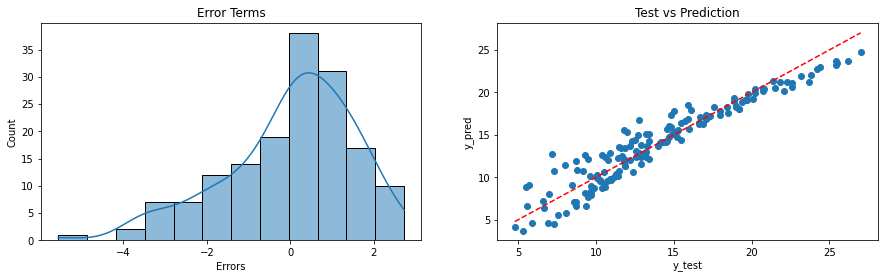

In [110]:

#Multivariate Linear Regression

MLR = LinearRegression().fit(X_train_std, Y_train)
pred1 = MLR.predict(X_train_std)
pred2 = MLR.predict(X_test_std)

print('{}{}\033[1m Evaluating Multiple Linear Regression Model \033[0m{}{}\n'.format(
    '<'*3, '-'*20, '-'*20, '>'*3))
print('The Coeffecient of the Regresion Model was found to be ', MLR.coef_)
print('The Intercept of the Regresion Model was found to be ', MLR.intercept_)

Evaluate(0, pred1, pred2)   #here 0 indicates first row for Linear Regression


In [111]:
Model_Evaluation_Comparison_Matrix

,Train-R2,Test-R2,Train-RSS,Test-RSS,Train-MSE,Test-MSE,Train-RMSE,Test-RMSE
0,0.904664,0.855618,381.140997,190.689898,2.412285,4.767247,1.553153,2.183403
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


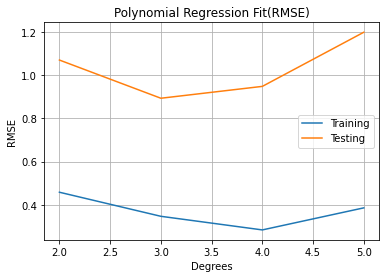

In [112]:
#using polynomial regression with multiple features
#first polynomial transform then linear regression
from sklearn.preprocessing import PolynomialFeatures

n_degrees = 6  #hit and trial method to find optimal degree 
TrainErr = []
TestErr=[]
for i in range(2,n_degrees):
    poly = PolynomialFeatures(degree=i)
    x_train_poly = poly.fit_transform(X_train_std)
    x_test_poly = poly.fit_transform(X_test_std)
    LinReg = LinearRegression()
    LinReg.fit(x_train_poly,Y_train)
    pred1 = LinReg.predict(x_train_poly)
    TrainErr.append(np.sqrt(mean_squared_error(Y_train,pred1)))
    pred2 = LinReg.predict(x_test_poly)
    TestErr.append(np.sqrt(mean_squared_error(Y_test, pred2)))


plt.plot(range(2, n_degrees), TrainErr, label="Training")
plt.plot(range(2, n_degrees), TestErr, label="Testing")
plt.legend()
plt.grid()
plt.title("Polynomial Regression Fit(RMSE)")
plt.xlabel("Degrees")
plt.ylabel("RMSE")
plt.show()


<<<-------------------- Evaluating Polynomial Regression Model -------------------->>>

The Coeffecient of the Regresion Model was found to be  [ 0.00000000e+00  2.90175333e+00  2.84261280e+00 -1.15552561e-02
 -6.85716786e-01  1.29981682e+00 -1.62145354e-02  3.34488549e-02
 -4.92721858e-02 -2.26498202e-03  3.87192287e-01 -1.44715194e-02
 -7.21842629e-03 -2.64901061e-02  1.04302720e-02  1.08778230e-02
  4.25465437e-02 -1.54891436e-02  2.83056798e-02  2.38984574e-02]
The Intercept of the Regresion Model was found to be  14.620297286547812


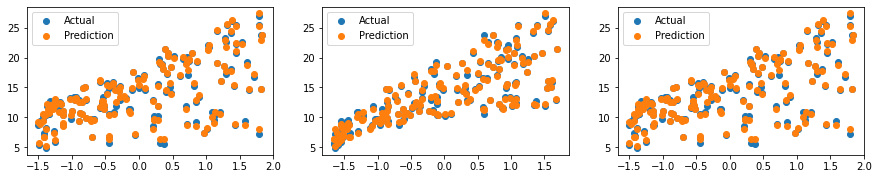



--------------------Training Set Metrics--------------------

R2-Score on Training set ---> 0.9952669310943744
Residual Sum of Squares (RSS) on Training set  ---> 18.92209922479433
Mean Squared Error (MSE) on Training set       ---> 0.11976012167591349
Root Mean Squared Error (RMSE) on Training set ---> 0.34606375377365584

--------------------Testing Set Metrics--------------------

R2-Score on Testing set ---> 0.9758016154501864
Residual Sum of Squares (RSS) on Training set  ---> 31.95952637687924
Mean Squared Error (MSE) on Training set       ---> 0.798988159421981
Root Mean Squared Error (RMSE) on Training set ---> 0.8938613759537778

--------------------Residual Plots--------------------


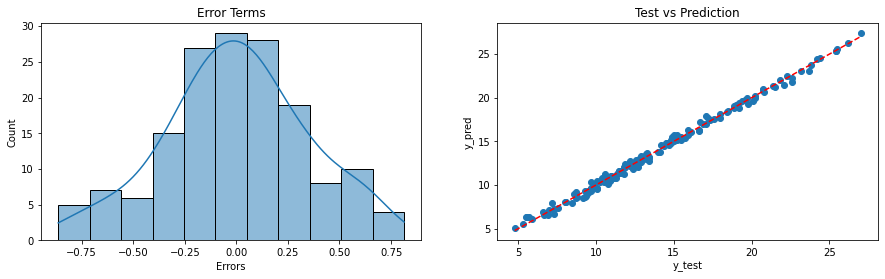

In [113]:
#choosing degree 3
poly = PolynomialFeatures(degree=3)
x_train_poly = poly.fit_transform(X_train_std)
x_test_poly = poly.transform(X_test_std)
LinReg = LinearRegression()
LinReg.fit(x_train_poly, Y_train)
pred1 = LinReg.predict(x_train_poly)
pred2 = LinReg.predict(x_test_poly)

print('{}{}\033[1m Evaluating Polynomial Regression Model \033[0m{}{}\n'.format(
    '<'*3, '-'*20, '-'*20, '>'*3))
print('The Coeffecient of the Regresion Model was found to be ', LinReg.coef_)
print('The Intercept of the Regresion Model was found to be ', LinReg.intercept_)
Evaluate(1,pred1,pred2)    # 1 represents polynomial regression

In [115]:
Model_Evaluation_Comparison_Matrix
#the polynomial regression best fit the advertisement sales dataset

,Train-R2,Test-R2,Train-RSS,Test-RSS,Train-MSE,Test-MSE,Train-RMSE,Test-RMSE
0,0.904664,0.855618,381.140997,190.689898,2.412285,4.767247,1.553153,2.183403
1,0.995267,0.975802,18.922099,31.959526,0.119760,0.798988,0.346064,0.893861
